## Problem 1 Handwritten Digit Recognition

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

/home/rongzhid/miniconda3/envs/csce790/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'libc10_hip.so: cannot open shared object file: No such file or directory'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
# converts the image into tensors and then normalize
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [3]:
# load dataset
trainset = datasets.MNIST('./MNIST_train', download=True, train=True, transform=transform)
valset = datasets.MNIST('./MNIST_test', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

In [4]:
# load image and lables iteratively
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


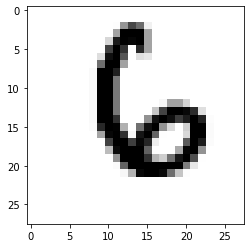

In [5]:
# show the first image in the training set
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

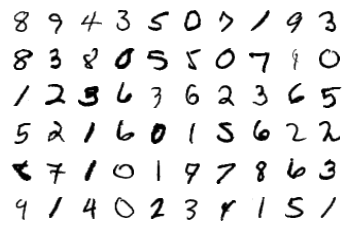

In [6]:
# show a random 6 x 10 figure matrix
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [7]:
# build a NN with input layer two hidden layer and a output layer
# using ReLu activate function
# using softmax to classify 
input_size = 784 
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [8]:
# define loss function
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

In [9]:
# show how backpropagation update weights
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003],
        [-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005],
        [ 0.0007,  0.0007,  0.0007,  ...,  0.0007,  0.0007,  0.0007],
        ...,
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004],
        [ 0.0014,  0.0014,  0.0014,  ...,  0.0014,  0.0014,  0.0014],
        [ 0.0017,  0.0017,  0.0017,  ...,  0.0017,  0.0017,  0.0017]])


In [10]:
# model training
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 100
train_loss =[]
valid_loss =[]
for e in range(epochs):
    training_loss = 0
    validation_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        training_loss += loss.item()
    else:
        train_loss.append(training_loss/len(trainloader))
#         print("Epoch {} - Training loss: {}".format(e, training_loss/len(trainloader)))
    for images, labels in valloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        output = model(images)
        loss = criterion(output, labels)

        validation_loss += loss.item()
    else:
        valid_loss.append(validation_loss/len(valloader))
    print("Epoch {} - Training loss: {} - Validation loss: {}".format(e, training_loss/len(trainloader), validation_loss/len(valloader)))

print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.636053245633777 - Validation loss: 0.2959387442393667
Epoch 1 - Training loss: 0.28601589425603974 - Validation loss: 0.26706485749240133
Epoch 2 - Training loss: 0.2216944028732619 - Validation loss: 0.18695400420362782
Epoch 3 - Training loss: 0.1766287640316972 - Validation loss: 0.1676749830033369
Epoch 4 - Training loss: 0.14704649977838752 - Validation loss: 0.13496603541503285
Epoch 5 - Training loss: 0.12464636884359663 - Validation loss: 0.128419549284491
Epoch 6 - Training loss: 0.10925049441201347 - Validation loss: 0.11502239014360176
Epoch 7 - Training loss: 0.09622034273231461 - Validation loss: 0.10805530941030782
Epoch 8 - Training loss: 0.085657590008311 - Validation loss: 0.0987429654901954
Epoch 9 - Training loss: 0.07822133965694955 - Validation loss: 0.09828821380747257
Epoch 10 - Training loss: 0.07053814247560336 - Validation loss: 0.10632605024370229
Epoch 11 - Training loss: 0.06569579358238464 - Validation loss: 0.0861081415965299
Ep

Epoch 96 - Training loss: 0.0005633769836042512 - Validation loss: 0.09082847494230854
Epoch 97 - Training loss: 0.0005550733552206009 - Validation loss: 0.09064990264376285
Epoch 98 - Training loss: 0.0005454381694582833 - Validation loss: 0.09050367259267335
Epoch 99 - Training loss: 0.0005370914284543618 - Validation loss: 0.09163542084839302

Training Time (in minutes) = 24.452090366681418


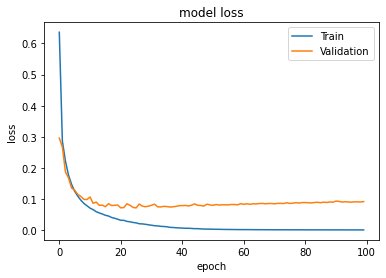

In [39]:
# plot the training and validation loss curve
import matplotlib.pyplot as plt

plt.plot(train_loss)
plt.plot(valid_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig('MNIST model loss.pdf', format='pdf')
plt.show()

In [12]:
# show the image and corresponding class probability
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.cpu().data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 6


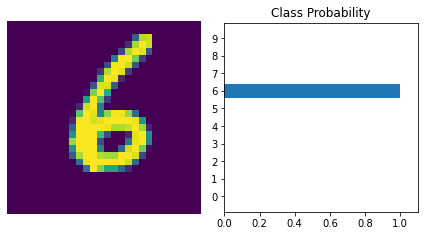

In [13]:
# test model
images, labels = next(iter(valloader))
img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [14]:
# calculate the accuracy
correct_count, all_count = 0, 0
for images,labels in valloader:
    for i in range(len(labels)):
        img = images[i].view(1, 784)
        with torch.no_grad():
            logps = model(img)
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
            correct_count += 1
        all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9808


In [15]:
torch.save(model, './my_mnist_model.pt') 

### Increase number of neurons in the hidden layers

In [35]:
# build a NN with input layer two hidden layer and a output layer
# using ReLu activate function
# using softmax to classify 
input_size = 784 
hidden_sizes1 = [128, 128]
output_size = 10

model1 = nn.Sequential(nn.Linear(input_size, hidden_sizes1[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes1[0], hidden_sizes1[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes1[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model1)
# define loss function
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model1(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [36]:
# model training
optimizer = optim.SGD(model1.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 100
train_loss1 =[]
valid_loss1 =[]
for e in range(epochs):
    training_loss = 0
    validation_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model1(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        training_loss += loss.item()
    else:
        train_loss1.append(training_loss/len(trainloader))
#         print("Epoch {} - Training loss: {}".format(e, training_loss/len(trainloader)))
    for images, labels in valloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        output = model1(images)
        loss = criterion(output, labels)

        validation_loss += loss.item()
    else:
        valid_loss1.append(validation_loss/len(valloader))
    print("Epoch {} - Training loss: {} - Validation loss: {}".format(e, training_loss/len(trainloader), validation_loss/len(valloader)))

print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6117495350333165 - Validation loss: 0.3186990424136447
Epoch 1 - Training loss: 0.27868004475257546 - Validation loss: 0.23576756661674778
Epoch 2 - Training loss: 0.21568142073447388 - Validation loss: 0.17967554912635475
Epoch 3 - Training loss: 0.1727280192184391 - Validation loss: 0.1638058407386397
Epoch 4 - Training loss: 0.14514427489515688 - Validation loss: 0.12778766005994027
Epoch 5 - Training loss: 0.12250423928631395 - Validation loss: 0.11599187521489372
Epoch 6 - Training loss: 0.10888647515255251 - Validation loss: 0.10651346920117451
Epoch 7 - Training loss: 0.09723064271030205 - Validation loss: 0.10653705289883977
Epoch 8 - Training loss: 0.08690835844312332 - Validation loss: 0.10046266092901017
Epoch 9 - Training loss: 0.07872617434013261 - Validation loss: 0.10334040659367089
Epoch 10 - Training loss: 0.07275529513443346 - Validation loss: 0.09228398637834248
Epoch 11 - Training loss: 0.06566906479278654 - Validation loss: 0.083781808576

Epoch 96 - Training loss: 0.0005982929726595681 - Validation loss: 0.08869740151952037
Epoch 97 - Training loss: 0.0005911637069733909 - Validation loss: 0.08866671587395486
Epoch 98 - Training loss: 0.0005781979045019856 - Validation loss: 0.0893701429690244
Epoch 99 - Training loss: 0.0005657167538467513 - Validation loss: 0.09084654913598929

Training Time (in minutes) = 24.23090180953344


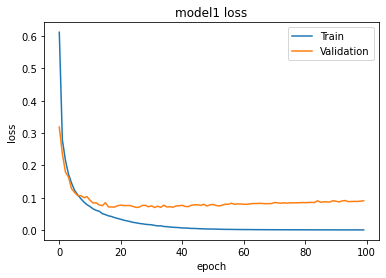

In [40]:
# plot the training and validation loss curve
import matplotlib.pyplot as plt

plt.plot(train_loss1)
plt.plot(valid_loss1)
plt.title('model1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.savefig('MNIST model1 loss.pdf', format='pdf')
plt.show()

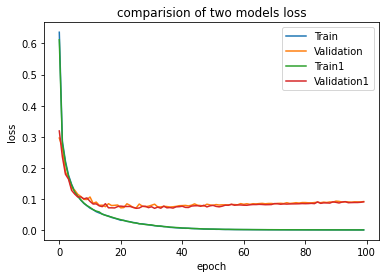

In [42]:
# compare two model's loss
plt.plot(train_loss)
plt.plot(valid_loss)
plt.plot(train_loss1)
plt.plot(valid_loss1)
plt.title('comparision of two models loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation', 'Train1', 'Validation1'], loc='upper right')
plt.savefig('comparison of MNIST model loss.pdf', format='pdf')
plt.show()

## Problem 2 Output surface of perceptron

### Define functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the hard limit function
def hard_limit(x, threshold=0):
    if x >= threshold:
        return 1
    else:
        return 0

# Define the radial basis function
def rbf_activation(x, centers, width):
    distances = np.linalg.norm(x - centers)
    return np.exp(-0.5 * (distances / width) ** 2)
    
# Define the input of activate function
def func(x1, x2):
    return -4.79 * x1 + 5.90 * x2 - 0.93

### sigmoid function

#### 100 samples

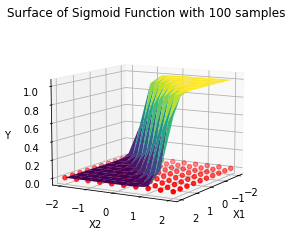

In [5]:
n_samples =10
x1 = np.linspace(-2, 2, n_samples)
x2 = np.linspace(-2, 2, n_samples)
X1, X2 = np.meshgrid(x1, x2)

# Calculate the output values
Y = np.zeros_like(X1)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Y[i, j] = sigmoid(func(X1[i, j], X2[i, j]))

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=10., azim=30)
surf = ax.plot_surface(X1, X2, Y, cmap='viridis')

# Plot the samples on the XY plane
ax.scatter(X1.flatten(), X2.flatten(), c='red')
plt.title('Surface of Sigmoid Function with ' + str(n_samples**2) + ' samples')
# Set labels for the axes
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# Show the plot
plt.savefig('Surface of Sigmoid Function with 100 samples.pdf', format='pdf')
plt.show()

#### 5000 samples

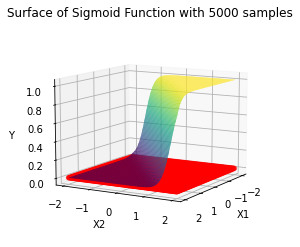

In [6]:
x1 = np.linspace(-2, 2, 50)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)

# Calculate the output values
Y = np.zeros_like(X1)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Y[i, j] = sigmoid(func(X1[i, j], X2[i, j]))

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=10., azim=30)
surf = ax.plot_surface(X1, X2, Y, cmap='viridis')
# fig.colorbar(surf, shrink=0.5, aspect=5)

# Plot the samples on the XY plane
ax.scatter(X1.flatten(), X2.flatten(), c='red')
plt.title('Surface of Sigmoid Function with 5000 samples')
# Set labels for the axes
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# Show the plot
plt.savefig('Surface of Sigmoid Function with 5000 samples.pdf', format='pdf')
plt.show()

#### 10000 samples

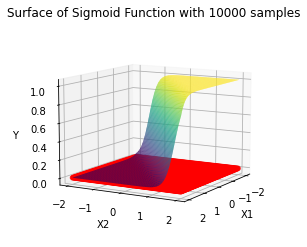

In [7]:
n_samples =100
x1 = np.linspace(-2, 2, n_samples)
x2 = np.linspace(-2, 2, n_samples)
X1, X2 = np.meshgrid(x1, x2)

# Calculate the output values
Y = np.zeros_like(X1)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Y[i, j] = sigmoid(func(X1[i, j], X2[i, j]))

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=10., azim=30)
surf = ax.plot_surface(X1, X2, Y, cmap='viridis')

# Plot the samples on the XY plane
ax.scatter(X1.flatten(), X2.flatten(), c='red')
plt.title('Surface of Sigmoid Function with ' + str(n_samples**2) + ' samples')
# Set labels for the axes
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# Show the plot
plt.savefig('Surface of Sigmoid Function with 10000 samples.pdf', format='pdf')
plt.show()

### Hard limit function

#### 100 samples

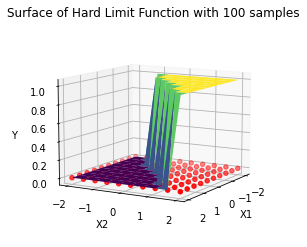

In [47]:
n_samples =10
x1 = np.linspace(-2, 2, n_samples)
x2 = np.linspace(-2, 2, n_samples)
X1, X2 = np.meshgrid(x1, x2)

# Calculate the output values
Y = np.zeros_like(X1)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Y[i, j] = hard_limit(func(X1[i, j], X2[i, j]))

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=10., azim=30)
surf = ax.plot_surface(X1, X2, Y, cmap='viridis')

# Plot the samples on the XY plane
ax.scatter(X1.flatten(), X2.flatten(), c='red')
plt.title('Surface of Hard Limit Function with ' + str(n_samples**2) + ' samples')
# Set labels for the axes
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# Show the plot
plt.savefig('Surface of Hard Limit Function with 100 samples.pdf', format='pdf')
plt.show()

#### 5000 samples

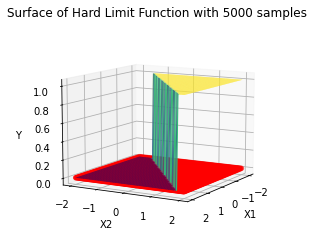

In [48]:
x1 = np.linspace(-2, 2, 50)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)

# Calculate the output values
Y = np.zeros_like(X1)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Y[i, j] = hard_limit(func(X1[i, j], X2[i, j]))

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=10., azim=30)
surf = ax.plot_surface(X1, X2, Y, cmap='viridis')

# Plot the samples on the XY plane
ax.scatter(X1.flatten(), X2.flatten(), c='red')
plt.title('Surface of Hard Limit Function with 5000 samples')
# Set labels for the axes
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# Show the plot
plt.savefig('Surface of Hard Limit Function with 5000 samples.pdf', format='pdf')
plt.show()

#### 10000 samples

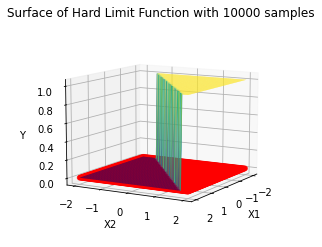

In [49]:
n_samples =100
x1 = np.linspace(-2, 2, n_samples)
x2 = np.linspace(-2, 2, n_samples)
X1, X2 = np.meshgrid(x1, x2)

# Calculate the output values
Y = np.zeros_like(X1)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Y[i, j] = hard_limit(func(X1[i, j], X2[i, j]))

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=10., azim=30)
surf = ax.plot_surface(X1, X2, Y, cmap='viridis')

# Plot the samples on the XY plane
ax.scatter(X1.flatten(), X2.flatten(), c='red')
plt.title('Surface of Hard Limit Function with ' + str(n_samples**2) + ' samples')
# Set labels for the axes
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# Show the plot
plt.savefig('Surface of Hard Limit Function with 10000 samples.pdf', format='pdf')
plt.show()

### Radial basis function

#### 100 samples

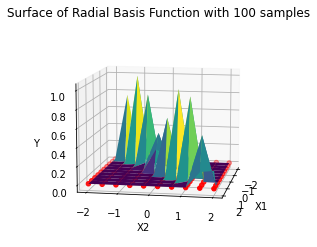

In [50]:
n_samples =10
x1 = np.linspace(-2, 2, n_samples)
x2 = np.linspace(-2, 2, n_samples)
X1, X2 = np.meshgrid(x1, x2)

# Define RBF center and width
rbf_center = np.array([0,0])
rbf_width = 1.0

# Calculate the output values
Y = np.zeros_like(X1)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Y[i, j] = rbf_activation(func(X1[i, j], X2[i, j]), rbf_center, rbf_width)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=10., azim=10)
surf = ax.plot_surface(X1, X2, Y, cmap='viridis')

# Plot the samples on the XY plane
ax.scatter(X1.flatten(), X2.flatten(), c='red')
plt.title('Surface of Radial Basis Function with ' + str(n_samples**2) + ' samples')
# Set labels for the axes
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# Show the plot
plt.savefig('Surface of Radial Basis Function with 100 samples.pdf', format='pdf')
plt.show()

#### 5000 samples

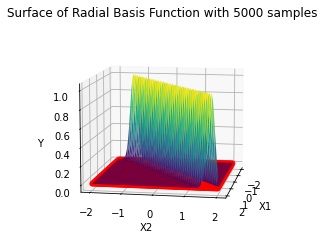

In [51]:
x1 = np.linspace(-2, 2, 50)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)

# Define RBF center and width
rbf_center = np.array([0, 0])
rbf_width = 1.0

# Calculate the output values
Y = np.zeros_like(X1)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Y[i, j] = rbf_activation(func(X1[i, j], X2[i, j]), rbf_center, rbf_width)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=10., azim=10)
surf = ax.plot_surface(X1, X2, Y, cmap='viridis')

# Plot the samples on the XY plane
ax.scatter(X1.flatten(), X2.flatten(), c='red')
plt.title('Surface of Radial Basis Function with 5000 samples')
# Set labels for the axes
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# Show the plot
plt.savefig('Surface of Radial Basis Function with 5000 samples.pdf', format='pdf')
plt.show()

#### 10000 samples

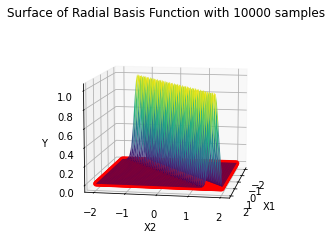

In [52]:
n_samples =100
x1 = np.linspace(-2, 2, n_samples)
x2 = np.linspace(-2, 2, n_samples)
X1, X2 = np.meshgrid(x1, x2)

# Define RBF center and width
rbf_center = np.array([0, 0])
rbf_width = 1.0

# Calculate the output values
Y = np.zeros_like(X1)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Y[i, j] = rbf_activation(func(X1[i, j], X2[i, j]), rbf_center, rbf_width)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=10., azim=10)
surf = ax.plot_surface(X1, X2, Y, cmap='viridis')

# Plot the samples on the XY plane
ax.scatter(X1.flatten(), X2.flatten(), c='red')
plt.title('Surface of Radial Basis Function with ' + str(n_samples**2) + ' samples')
# Set labels for the axes
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# Show the plot
plt.savefig('Surface of Radial Basis Function with 10000 samples.pdf', format='pdf')
plt.show()

## Problem 3 Output surface of 2-layer NN

### Define functions

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the hard limit function
def hard_limit(x, threshold=0):
    if x >= threshold:
        return 1
    else:
        return 0

# Define the radial basis function
def rbf_activation(x, centers, width):
    distances = np.linalg.norm(x - centers, axis=1)
    return np.exp(-0.5 * (distances / width) ** 2)

# Define the input of activate function
def func(x1, x2):
    x = np.array([[x1], [x2]])
    VT = np.array([[-2.69, -2.80], [-3.39, -4.56]])
    bv = np.array([[-2.21],[4.76]])
    return np.dot(VT,x) + bv

W = np.array([[-4.91], [4.95]])
bw = -2.28

### sigmoid function

#### 100 samples

/tmp/ipykernel_842390/1745148259.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y[i, j] = np.dot(W.T, sigmoid(func(X1[i, j], X2[i, j]))) + bw


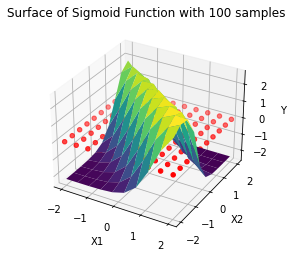

In [54]:
n_samples =10
x1 = np.linspace(-2, 2, n_samples)
x2 = np.linspace(-2, 2, n_samples)
X1, X2 = np.meshgrid(x1, x2)

# Calculate the output values
Y = np.zeros_like(X1)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Y[i, j] = np.dot(W.T, sigmoid(func(X1[i, j], X2[i, j]))) + bw

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.view_init(elev=10., azim=30)
surf = ax.plot_surface(X1, X2, Y, cmap='viridis')

# Plot the samples on the XY plane
ax.scatter(X1.flatten(), X2.flatten(), c='red')
plt.title('Surface of Sigmoid Function with ' + str(n_samples**2) + ' samples')
# Set labels for the axes
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# Show the plot
plt.savefig('Surface of Sigmoid Function with 100 samples1.pdf', format='pdf')
plt.show()

#### 5000 samples

/tmp/ipykernel_842390/1215840969.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y[i, j] = np.dot(W.T, sigmoid(func(X1[i, j], X2[i, j]))) + bw


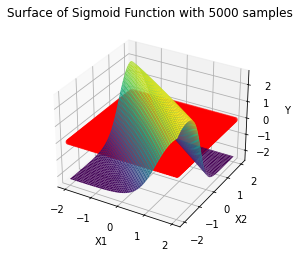

In [55]:
x1 = np.linspace(-2, 2, 50)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)

# Calculate the output values
Y = np.zeros_like(X1)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Y[i, j] = np.dot(W.T, sigmoid(func(X1[i, j], X2[i, j]))) + bw

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.view_init(elev=10., azim=30)
surf = ax.plot_surface(X1, X2, Y, cmap='viridis')

# Plot the samples on the XY plane
ax.scatter(X1.flatten(), X2.flatten(), c='red')
plt.title('Surface of Sigmoid Function with 5000 samples')
# Set labels for the axes
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# Show the plot
plt.savefig('Surface of Sigmoid Function with 5000 samples1.pdf', format='pdf')
plt.show()

#### 10000 samples

/tmp/ipykernel_842390/4046220994.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y[i, j] = np.dot(W.T, sigmoid(func(X1[i, j], X2[i, j]))) + bw


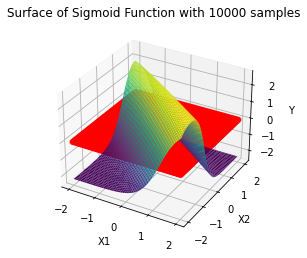

In [56]:
n_samples =100
x1 = np.linspace(-2, 2, n_samples)
x2 = np.linspace(-2, 2, n_samples)
X1, X2 = np.meshgrid(x1, x2)

# Calculate the output values
Y = np.zeros_like(X1)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Y[i, j] = np.dot(W.T, sigmoid(func(X1[i, j], X2[i, j]))) + bw

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.view_init(elev=10., azim=30)
surf = ax.plot_surface(X1, X2, Y, cmap='viridis')

# Plot the samples on the XY plane
ax.scatter(X1.flatten(), X2.flatten(), c='red')
plt.title('Surface of Sigmoid Function with ' + str(n_samples**2) + ' samples')
# Set labels for the axes
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# Show the plot
plt.savefig('Surface of Sigmoid Function with 10000 samples1.pdf', format='pdf')
plt.show()

### Hard limit function

#### 100 samples

/tmp/ipykernel_842390/2601810815.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y[i, j] = np.dot(W.T, np.array([[hard_limit(func(X1[i, j], X2[i, j])[0][0])], [hard_limit(func(X1[i, j], X2[i, j])[1][0])]])) + bw


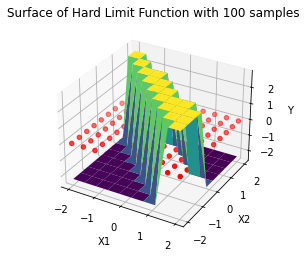

In [57]:
n_samples =10
x1 = np.linspace(-2, 2, n_samples)
x2 = np.linspace(-2, 2, n_samples)
X1, X2 = np.meshgrid(x1, x2)

# Calculate the output values
Y = np.zeros_like(X1)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Y[i, j] = np.dot(W.T, np.array([[hard_limit(func(X1[i, j], X2[i, j])[0][0])], [hard_limit(func(X1[i, j], X2[i, j])[1][0])]])) + bw

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.view_init(elev=10., azim=30)
surf = ax.plot_surface(X1, X2, Y, cmap='viridis')

# Plot the samples on the XY plane
ax.scatter(X1.flatten(), X2.flatten(), c='red')
plt.title('Surface of Hard Limit Function with ' + str(n_samples**2) + ' samples')
# Set labels for the axes
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# Show the plot
plt.savefig('Surface of Hard Limit Function with 100 samples1.pdf', format='pdf')
plt.show()

#### 5000 samples

/tmp/ipykernel_842390/4136119358.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y[i, j] = np.dot(W.T, np.array([[hard_limit(func(X1[i, j], X2[i, j])[0][0])], [hard_limit(func(X1[i, j], X2[i, j])[1][0])]])) + bw


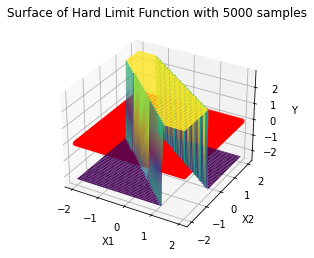

In [58]:
x1 = np.linspace(-2, 2, 50)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)

# Calculate the output values
Y = np.zeros_like(X1)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Y[i, j] = np.dot(W.T, np.array([[hard_limit(func(X1[i, j], X2[i, j])[0][0])], [hard_limit(func(X1[i, j], X2[i, j])[1][0])]])) + bw

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.view_init(elev=10., azim=30)
surf = ax.plot_surface(X1, X2, Y, cmap='viridis')

# Plot the samples on the XY plane
ax.scatter(X1.flatten(), X2.flatten(), c='red')
plt.title('Surface of Hard Limit Function with 5000 samples')
# Set labels for the axes
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# Show the plot
plt.savefig('Surface of Hard Limit Function with 5000 samples1.pdf', format='pdf')
plt.show()

#### 10000 samples

/tmp/ipykernel_842390/1950373066.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y[i, j] = np.dot(W.T, np.array([[hard_limit(func(X1[i, j], X2[i, j])[0][0])], [hard_limit(func(X1[i, j], X2[i, j])[1][0])]])) + bw


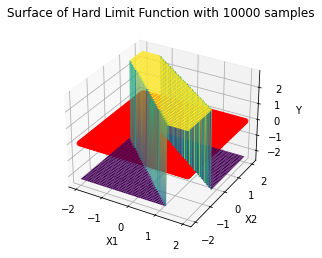

In [59]:
n_samples =100
x1 = np.linspace(-2, 2, n_samples)
x2 = np.linspace(-2, 2, n_samples)
X1, X2 = np.meshgrid(x1, x2)

# Calculate the output values
Y = np.zeros_like(X1)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Y[i, j] = np.dot(W.T, np.array([[hard_limit(func(X1[i, j], X2[i, j])[0][0])], [hard_limit(func(X1[i, j], X2[i, j])[1][0])]])) + bw

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.view_init(elev=10., azim=30)
surf = ax.plot_surface(X1, X2, Y, cmap='viridis')

# Plot the samples on the XY plane
ax.scatter(X1.flatten(), X2.flatten(), c='red')
plt.title('Surface of Hard Limit Function with ' + str(n_samples**2) + ' samples')
# Set labels for the axes
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# Show the plot
plt.savefig('Surface of Hard Limit Function with 10000 samples1.pdf', format='pdf')
plt.show()

### Radial basis function

#### 100 samples

/tmp/ipykernel_842390/2475413975.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y[i, j] = np.dot(W.T, rbf_activation(func(X1[i, j], X2[i, j]), rbf_center, rbf_width)) + bw


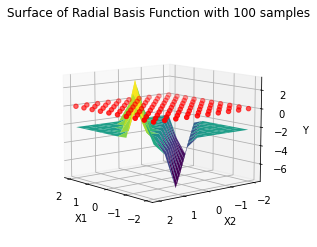

In [60]:
n_samples =10
x1 = np.linspace(-2, 2, n_samples)
x2 = np.linspace(-2, 2, n_samples)
X1, X2 = np.meshgrid(x1, x2)

# Define RBF center and width
rbf_center = np.array([0, 0])
rbf_width = 1.0

# Calculate the output values
Y = np.zeros_like(X1)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Y[i, j] = np.dot(W.T, rbf_activation(func(X1[i, j], X2[i, j]), rbf_center, rbf_width)) + bw

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=10., azim=140)
surf = ax.plot_surface(X1, X2, Y, cmap='viridis')

# Plot the samples on the XY plane
ax.scatter(X1.flatten(), X2.flatten(), c='red')
plt.title('Surface of Radial Basis Function with ' + str(n_samples**2) + ' samples')
# Set labels for the axes
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# Show the plot
plt.savefig('Surface of Radial Basis Function with 100 samples1.pdf', format='pdf')
plt.show()

#### 5000 samples

/tmp/ipykernel_842390/804136063.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y[i, j] = np.dot(W.T, rbf_activation(func(X1[i, j], X2[i, j]), rbf_center, rbf_width)) + bw


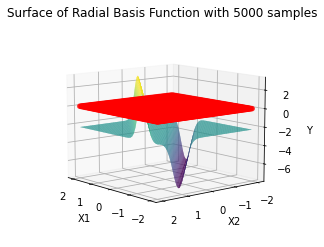

In [61]:
x1 = np.linspace(-2, 2, 50)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)

# Define RBF center and width
rbf_center = np.array([0, 0])
rbf_width = 1.0

# Calculate the output values
Y = np.zeros_like(X1)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Y[i, j] = np.dot(W.T, rbf_activation(func(X1[i, j], X2[i, j]), rbf_center, rbf_width)) + bw

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=10., azim=140)
surf = ax.plot_surface(X1, X2, Y, cmap='viridis')

# Plot the samples on the XY plane
ax.scatter(X1.flatten(), X2.flatten(), c='red')
plt.title('Surface of Radial Basis Function with 5000 samples')
# Set labels for the axes
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# Show the plot
plt.savefig('Surface of Radial Basis Function with 5000 samples1.pdf', format='pdf')
plt.show()

#### 10000 samples

/tmp/ipykernel_842390/1858600711.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Y[i, j] = np.dot(W.T, rbf_activation(func(X1[i, j], X2[i, j]), rbf_center, rbf_width)) + bw


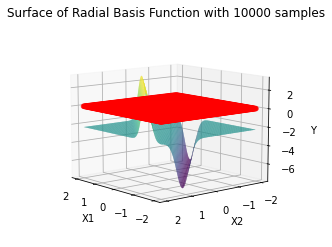

In [62]:
n_samples =100
x1 = np.linspace(-2, 2, n_samples)
x2 = np.linspace(-2, 2, n_samples)
X1, X2 = np.meshgrid(x1, x2)

# Define RBF center and width
rbf_center = np.array([0, 0])
rbf_width = 1.0

# Calculate the output values
Y = np.zeros_like(X1)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Y[i, j] = np.dot(W.T, rbf_activation(func(X1[i, j], X2[i, j]), rbf_center, rbf_width)) + bw

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=10., azim=140)
surf = ax.plot_surface(X1, X2, Y, cmap='viridis')

# Plot the samples on the XY plane
ax.scatter(X1.flatten(), X2.flatten(), c='red')
plt.title('Surface of Radial Basis Function with ' + str(n_samples**2) + ' samples')
# Set labels for the axes
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

# Show the plot
plt.savefig('Surface of Radial Basis Function with 10000 samples1.pdf', format='pdf')
plt.show()

## Problem4 Building CNN using Numpy

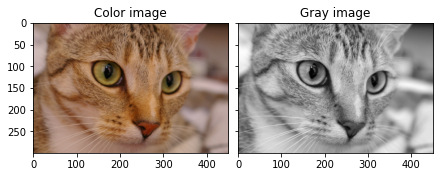

In [75]:
from skimage import data, io, color
import numpy
import matplotlib.pyplot as plt

# Reading the image  
img_rgb = data.chelsea()
# Converting the image into gray.  
img_gray = color.rgb2gray(img_rgb)
# Show images
fig, (ax1, ax2) = plt.subplots(1, 2, layout='constrained', sharey=True)

ax1.imshow(img_rgb)
ax1.set_title("Color image")

ax2.imshow(img_gray, cmap='gray')
ax2.set_title("Gray image")
plt.savefig('color and gray images.pdf', format='pdf')
plt.show()

In [76]:
# difine first layer filter
l1_filter = np.zeros((2,3,3))
l1_filter[0, :, :] = np.array([[[-1, 0, 1],    
                                   [-1, 0, 1],    
                                   [-1, 0, 1]]])   
l1_filter[1, :, :] = np.array([[[1,   1,  1],    
                                   [0,   0,  0],    
                                   [-1, -1, -1]]])

In [77]:
# define convolution function
def conv(img, conv_filter):  
    if len(img.shape) > 2 or len(conv_filter.shape) > 3: # Check if number of image channels matches the filter depth.  
        if img.shape[-1] != conv_filter.shape[-1]:  
            print("Error: Number of channels in both image and filter must match.")  
            sys.exit()  
    if conv_filter.shape[1] != conv_filter.shape[2]: # Check if filter dimensions are equal.  
        print('Error: Filter must be a square matrix. I.e. number of rows and columns must match.')  
        sys.exit()  
    if conv_filter.shape[1]%2==0: # Check if filter diemnsions are odd.  
        print('Error: Filter must have an odd size. I.e. number of rows and columns must be odd.')  
        sys.exit()  

    # An empty feature map to hold the output of convolving the filter(s) with the image.  
    feature_maps = numpy.zeros((img.shape[0]-conv_filter.shape[1]+1,   
                                img.shape[1]-conv_filter.shape[1]+1,   
                                conv_filter.shape[0]))  
   
    # Convolving the image by the filter(s).
    for filter_num in range(conv_filter.shape[0]):  
        print("Filter ", filter_num + 1)  
        curr_filter = conv_filter[filter_num, :] # getting a filter from the bank.  
        """  
        Checking if there are mutliple channels for the single filter. 
        If so, then each channel will convolve the image. 
        The result of all convolutions are summed to return a single feature map. 
        """  
        if len(curr_filter.shape) > 2:  
            conv_map = conv_(img[:, :, 0], curr_filter[:, :, 0]) # Array holding the sum of all feature maps.  
            for ch_num in range(1, curr_filter.shape[-1]): # Convolving each channel with the image and summing the results.  
                conv_map = conv_map + conv_(img[:, :, ch_num],   
                                    curr_filter[:, :, ch_num])  
        else: # There is just a single channel in the filter.  
            conv_map = conv_(img, curr_filter)  
        feature_maps[:, :, filter_num] = conv_map # Holding feature map with the current filter.
    return feature_maps # Returning all feature maps. 

In [78]:
# define convolution operation
def conv_(img, conv_filter):
    filter_size = conv_filter.shape[0]  
    result = numpy.zeros((img.shape))  
    #Looping through the image to apply the convolution operation.  
    for r in numpy.uint16(numpy.arange(filter_size/2, img.shape[0]-filter_size/2-2)):  
        for c in numpy.uint16(numpy.arange(filter_size/2, img.shape[1]-filter_size/2-2)):  
            #Getting the current region to get multiplied with the filter.  
            curr_region = img[r:r+filter_size, c:c+filter_size]  
            #Element-wise multipliplication between the current region and the filter.  
            curr_result = curr_region * conv_filter  
            conv_sum = numpy.sum(curr_result) #Summing the result of multiplication.  
            result[r, c] = conv_sum #Saving the summation in the convolution layer feature map.  
         
    #Clipping the outliers of the result matrix.  
    final_result = result[numpy.uint16(filter_size/2):result.shape[0]-numpy.uint16(filter_size/2),   
                          numpy.uint16(filter_size/2):result.shape[1]-numpy.uint16(filter_size/2)]  
    return final_result 

Filter  1
Filter  2


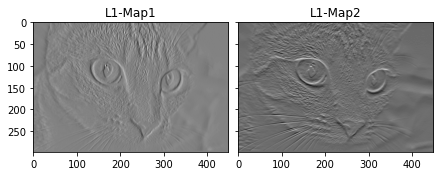

In [79]:
# show the feature maps after conv layer
l1_feature_map = conv(img_gray, l1_filter)

img1 = l1_feature_map[:,:,0]
img2 = l1_feature_map[:,:,1]

fig, (ax1, ax2) = plt.subplots(1, 2, layout='constrained', sharey=True)

ax1.imshow(img1, cmap='gray')
ax1.set_title("L1-Map1")

ax2.imshow(img2, cmap='gray')
ax2.set_title("L1-Map2")
plt.savefig('features maps after conv layer.pdf', format='pdf')
plt.show()

In [80]:
# define ReLU function
def relu(feature_map):  
    #Preparing the output of the ReLU activation function.  
    relu_out = numpy.zeros(feature_map.shape)  
    for map_num in range(feature_map.shape[-1]):  
        for r in numpy.arange(0,feature_map.shape[0]):  
            for c in numpy.arange(0, feature_map.shape[1]):  
                relu_out[r, c, map_num] = numpy.max(feature_map[r, c, map_num], 0)
    return relu_out

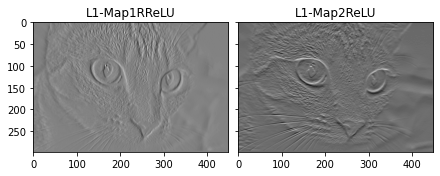

In [81]:
# show the feature maps after ReLU layer
l1_feature_map_relu = relu(l1_feature_map)
img1 = l1_feature_map_relu[:,:,0]
img2 = l1_feature_map_relu[:,:,1]

fig, (ax1, ax2) = plt.subplots(1, 2, layout='constrained', sharey=True)

ax1.imshow(img1, cmap='gray')
ax1.set_title("L1-Map1RReLU")

ax2.imshow(img2, cmap='gray')
ax2.set_title("L1-Map2ReLU")
plt.savefig('features maps after ReLU layer.pdf', format='pdf')
plt.show()

In [82]:
# define maxing pooling function
def pooling(feature_map, size=2, stride=2):  
    #Preparing the output of the pooling operation.  
    pool_out = numpy.zeros((numpy.uint16((feature_map.shape[0]-size+1)/stride),  
                            numpy.uint16((feature_map.shape[1]-size+1)/stride),  
                            feature_map.shape[-1]))  
    for map_num in range(feature_map.shape[-1]):  
        r2 = 0  
        for r in numpy.arange(0,feature_map.shape[0]-size-1, stride):  
            c2 = 0  
            for c in numpy.arange(0, feature_map.shape[1]-size-1, stride):  
                pool_out[r2, c2, map_num] = numpy.max(feature_map[r:r+size,  c:c+size])  
                c2 = c2 + 1  
            r2 = r2 +1
    return pool_out

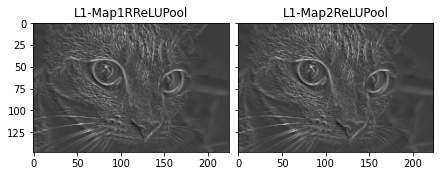

In [83]:
# show the feature maps after maxing pooling layer
l1_feature_map_relu_pool = pooling(l1_feature_map_relu, 2, 2)
img1 = l1_feature_map_relu_pool[:,:,0]
img2 = l1_feature_map_relu_pool[:,:,1]

fig, (ax1, ax2) = plt.subplots(1, 2, layout='constrained', sharey=True)

ax1.imshow(img1, cmap='gray')
ax1.set_title("L1-Map1RReLUPool")

ax2.imshow(img2, cmap='gray')
ax2.set_title("L1-Map2ReLUPool")
plt.savefig('features maps after max pooling layer.pdf', format='pdf')
plt.show()

In [84]:
# add second conv layer  
l2_filter = numpy.random.rand(3, 5, 5, l1_feature_map_relu_pool.shape[-1])  
print("\n**Working with conv layer 2**")  
l2_feature_map = conv(l1_feature_map_relu_pool, l2_filter)  
print("\n**ReLU**")  
l2_feature_map_relu = relu(l2_feature_map)  
print("\n**Pooling**")  
l2_feature_map_relu_pool = pooling(l2_feature_map_relu, 2, 2)  
print("**End of conv layer 2**\n") 


**Working with conv layer 2**
Filter  1
Filter  2
Filter  3

**ReLU**

**Pooling**
**End of conv layer 2**



Filter  1
Filter  2
Filter  3


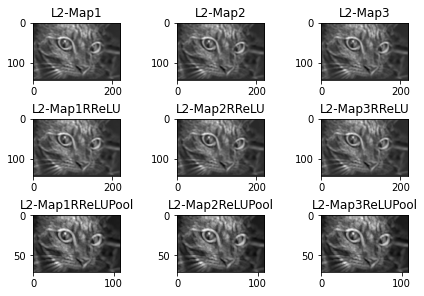

In [85]:
# show feature map of layer2
l2_feature_map = conv(l1_feature_map_relu_pool, l2_filter)   
img1 = l2_feature_map[:,:,0]
img2 = l2_feature_map[:,:,1]
img3 = l2_feature_map[:,:,2]
img4 = l2_feature_map_relu[:,:,0]
img5 = l2_feature_map_relu[:,:,1]
img6 = l2_feature_map_relu[:,:,2]
img7 = l2_feature_map_relu_pool[:,:,0]
img8 = l2_feature_map_relu_pool[:,:,1]
img9 = l2_feature_map_relu_pool[:,:,2]

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, layout='constrained')

ax1.imshow(img1, cmap='gray')
ax1.set_title("L2-Map1")

ax2.imshow(img2, cmap='gray')
ax2.set_title("L2-Map2")

ax3.imshow(img3, cmap='gray')
ax3.set_title("L2-Map3")

ax4.imshow(img4, cmap='gray')
ax4.set_title("L2-Map1RReLU")

ax5.imshow(img5, cmap='gray')
ax5.set_title("L2-Map2RReLU")

ax6.imshow(img6, cmap='gray')
ax6.set_title("L2-Map3RReLU")

ax7.imshow(img7, cmap='gray')
ax7.set_title("L2-Map1RReLUPool")

ax8.imshow(img8, cmap='gray')
ax8.set_title("L2-Map2ReLUPool")

ax9.imshow(img9, cmap='gray')
ax9.set_title("L2-Map3ReLUPool")


plt.savefig('features maps of second layer.pdf', format='pdf')
plt.show()

In [86]:
# add third conv layer  
l3_filter = numpy.random.rand(1, 7, 7, l2_feature_map_relu_pool.shape[-1])  
print("\n**Working with conv layer 3**")  
l3_feature_map = conv(l2_feature_map_relu_pool, l3_filter)  
print("\n**ReLU**")  
l3_feature_map_relu = relu(l3_feature_map)  
print("\n**Pooling**")  
l3_feature_map_relu_pool = pooling(l3_feature_map_relu, 2, 2)  
print("**End of conv layer 3**\n") 


**Working with conv layer 3**
Filter  1

**ReLU**

**Pooling**
**End of conv layer 3**



Filter  1


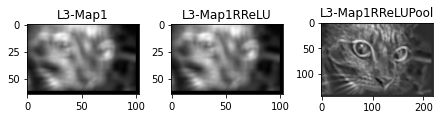

In [87]:
# show features maps of layer3    
l3_feature_map = conv(l2_feature_map_relu_pool, l3_filter)
img1 = l3_feature_map[:,:,0]
img2 = l3_feature_map_relu[:,:,0]
img5 = l3_feature_map_relu_pool[:,:,0]


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, layout='constrained')

ax1.imshow(img1, cmap='gray')
ax1.set_title("L3-Map1")

ax2.imshow(img2, cmap='gray')
ax2.set_title("L3-Map1RReLU")

ax3.imshow(img3, cmap='gray')
ax3.set_title("L3-Map1RReLUPool")

plt.savefig('features maps of third layer.pdf', format='pdf')
plt.show()

## Problem 5 Building CNN using Numpy

### Define Networks

In [88]:
# conv layer is used to isolate different features present in the image
class ConvolutionLayer:
    def __init__(self, kernel_num, kernel_size):
        """
        Constructor takes as input the number of kernels and their size. I assume only squared filters of size kernel_size x kernel_size
        """
        self.kernel_num = kernel_num
        self.kernel_size = kernel_size
        # Generate random filters of shape (kernel_num, kernel_size, kernel_size). Divide by kernel_size^2 for weight normalization
        self.kernels = np.random.randn(kernel_num, kernel_size, kernel_size) / (kernel_size**2)

    def patches_generator(self, image):
        """
        Divide the input image in patches to be used during convolution.
        Yields the tuples containing the patches and their coordinates.
        """
        # Extract image height and width
        image_h, image_w = image.shape
        self.image = image
        # The number of patches, given a fxf filter is h-f+1 for height and w-f+1 for width
        for h in range(image_h-self.kernel_size+1):
            for w in range(image_w-self.kernel_size+1):
                patch = image[h:(h+self.kernel_size), w:(w+self.kernel_size)]
                yield patch, h, w
    
    def forward_prop(self, image):
        """
        Perform forward propagation for the convolutional layer.
        """
        # Extract image height and width
        image_h, image_w = image.shape
        # Initialize the convolution output volume of the correct size
        convolution_output = np.zeros((image_h-self.kernel_size+1, image_w-self.kernel_size+1, self.kernel_num))
        # Unpack the generator
        for patch, h, w in self.patches_generator(image):
            # Perform convolution for each patch
            convolution_output[h,w] = np.sum(patch*self.kernels, axis=(1,2))
        return convolution_output
    
    def back_prop(self, dE_dY, alpha):
        """
        Takes the gradient of the loss function with respect to the output and computes the gradients of the loss function with respect
        to the kernels' weights.
        dE_dY comes from the following layer, typically max pooling layer.
        It updates the kernels' weights
        """
        # Initialize gradient of the loss function with respect to the kernel weights
        dE_dk = np.zeros(self.kernels.shape)
        for patch, h, w in self.patches_generator(self.image):
            for f in range(self.kernel_num):
                dE_dk[f] += patch * dE_dY[h, w, f]
        # Update the parameters
        self.kernels -= alpha*dE_dk
        return dE_dk

# pooling layer is used to shrink the input images to reduce the computation and memory needed
class MaxPoolingLayer:
    def __init__(self, kernel_size):
        """
        Constructor takes as input the size of the kernel
        """
        self.kernel_size = kernel_size

    def patches_generator(self, image):
        """
        Divide the input image in patches to be used during pooling.
        Yields the tuples containing the patches and their coordinates.
        """
        # Compute the ouput size
        output_h = image.shape[0] // self.kernel_size
        output_w = image.shape[1] // self.kernel_size
        self.image = image

        for h in range(output_h):
            for w in range(output_w):
                patch = image[(h*self.kernel_size):(h*self.kernel_size+self.kernel_size), (w*self.kernel_size):(w*self.kernel_size+self.kernel_size)]
                yield patch, h, w

    def forward_prop(self, image):
        image_h, image_w, num_kernels = image.shape
        max_pooling_output = np.zeros((image_h//self.kernel_size, image_w//self.kernel_size, num_kernels))
        for patch, h, w in self.patches_generator(image):
            max_pooling_output[h,w] = np.amax(patch, axis=(0,1))
        return max_pooling_output

    def back_prop(self, dE_dY):
        """
        Takes the gradient of the loss function with respect to the output and computes the gradients of the loss function with respect
        to the kernels' weights.
        dE_dY comes from the following layer, typically softmax.
        There are no weights to update, but the output is needed to update the weights of the convolutional layer.
        """
        dE_dk = np.zeros(self.image.shape)
        for patch,h,w in self.patches_generator(self.image):
            image_h, image_w, num_kernels = patch.shape
            max_val = np.amax(patch, axis=(0,1))

            for idx_h in range(image_h):
                for idx_w in range(image_w):
                    for idx_k in range(num_kernels):
                        if patch[idx_h,idx_w,idx_k] == max_val[idx_k]:
                            dE_dk[h*self.kernel_size+idx_h, w*self.kernel_size+idx_w, idx_k] = dE_dY[h,w,idx_k]
        return dE_dk

# softmax layer is used to classify the output
class SoftmaxLayer:
    """
    Takes the volume coming from convolutional & pooling layers. It flattens it and it uses it in the next layers.
    """
    def __init__(self, input_units, output_units):
        # Initiallize weights and biases
        self.weight = np.random.randn(input_units, output_units)/input_units
        self.bias = np.zeros(output_units)

    def forward_prop(self, image):
        self.original_shape = image.shape # stored for backprop
        # Flatten the image
        image_flattened = image.flatten()
        self.flattened_input = image_flattened # stored for backprop
        # Perform matrix multiplication and add bias
        first_output = np.dot(image_flattened, self.weight) + self.bias
        self.output = first_output
        # Apply softmax activation
        softmax_output = np.exp(first_output) / np.sum(np.exp(first_output), axis=0)
        return softmax_output

    def back_prop(self, dE_dY, alpha):
        for i, gradient in enumerate(dE_dY):
            if gradient == 0:
                continue
            transformation_eq = np.exp(self.output)
            S_total = np.sum(transformation_eq)

            # Compute gradients with respect to output (Z)
            dY_dZ = -transformation_eq[i]*transformation_eq / (S_total**2)
            dY_dZ[i] = transformation_eq[i]*(S_total - transformation_eq[i]) / (S_total**2)

            # Compute gradients of output Z with respect to weight, bias, input
            dZ_dw = self.flattened_input
            dZ_db = 1
            dZ_dX = self.weight

            # Gradient of loss with respect ot output
            dE_dZ = gradient * dY_dZ

            # Gradient of loss with respect to weight, bias, input
            dE_dw = dZ_dw[np.newaxis].T @ dE_dZ[np.newaxis]
            dE_db = dE_dZ * dZ_db
            dE_dX = dZ_dX @ dE_dZ

            # Update parameters
            self.weight -= alpha*dE_dw
            self.bias -= alpha*dE_db

            return dE_dX.reshape(self.original_shape)

# forward of network 
def CNN_forward(image, label, layers):
    output = image/255.
    for layer in layers:
        output = layer.forward_prop(output)
    # Compute loss (cross-entropy) and accuracy
    loss = -np.log(output[label])
    accuracy = 1 if np.argmax(output) == label else 0
    return output, loss, accuracy

# backpropagation to update weights
def CNN_backprop(gradient, layers, alpha=0.05):
    grad_back = gradient
    for layer in layers[::-1]:
        if type(layer) in [ConvolutionLayer, SoftmaxLayer]:
            grad_back = layer.back_prop(grad_back, alpha)
        elif type(layer) == MaxPoolingLayer:
            grad_back = layer.back_prop(grad_back)
    return grad_back

# model training process
def CNN_training(image, label, layers, alpha=0.05):
    # Forward step
    output, loss, accuracy = CNN_forward(image, label, layers)

    # Initial gradient
    gradient = np.zeros(10)
    gradient[label] = -1/output[label]

    # Backprop step
    gradient_back = CNN_backprop(gradient, layers, alpha)

    return loss, accuracy


In [90]:
import numpy as np
import tensorflow as tf

def main():
    # Load training data
    (X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
    X_train = X_train[:1000]
    y_train = y_train[:1000]

    # Define the network
    layers = [
        ConvolutionLayer(16,3), # layer with 8 3x3 filters, output (26,26,16)
        MaxPoolingLayer(2), # pooling layer 2x2, output (13,13,16)
        SoftmaxLayer(13*13*16, 10) # softmax layer with 13*13*16 input and 10 output
        ] 

    for epoch in range(4):
        print('Epoch {} ->'.format(epoch+1))
        # Shuffle training data
        permutation = np.random.permutation(len(X_train))
        X_train = X_train[permutation]
        y_train = y_train[permutation]
        # Training the CNN
        loss = 0
        accuracy = 0
        for i, (image, label) in enumerate(zip(X_train, y_train)):
            if i % 100 == 0: # Every 100 examples
                print("Step {}. For the last 100 steps: average loss {}, accuracy {}".format(i+1, loss/100, accuracy))
                loss = 0
                accuracy = 0
            loss_1, accuracy_1 = CNN_training(image, label, layers)
            loss += loss_1
            accuracy += accuracy_1

if __name__ == "__main__":
    main()
  

Epoch 1 ->
Step 1. For the last 100 steps: average loss 0.0, accuracy 0
Step 101. For the last 100 steps: average loss 1.8207534927429903, accuracy 52
Step 201. For the last 100 steps: average loss 1.0151821409901896, accuracy 69
Step 301. For the last 100 steps: average loss 0.6871515542545142, accuracy 78
Step 401. For the last 100 steps: average loss 0.7461981777672797, accuracy 79
Step 501. For the last 100 steps: average loss 0.7749590811390142, accuracy 77
Step 601. For the last 100 steps: average loss 0.5993568670594933, accuracy 81
Step 701. For the last 100 steps: average loss 0.4702403315653769, accuracy 84
Step 801. For the last 100 steps: average loss 0.6896495940164873, accuracy 86
Step 901. For the last 100 steps: average loss 0.6908890346366842, accuracy 84
Epoch 2 ->
Step 1. For the last 100 steps: average loss 0.0, accuracy 0
Step 101. For the last 100 steps: average loss 0.20119017806206305, accuracy 93
Step 201. For the last 100 steps: average loss 0.5084178684697394

## Problem 6 Graph Neural Networks

In [91]:
## Standard libraries
import os
import json
import math
import numpy as np
import time

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgb
import matplotlib
matplotlib.rcParams['lines.linewidth'] = 2.0
import seaborn as sns
sns.reset_orig()
sns.set()

## Progress bar
from tqdm.notebook import tqdm

## PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim
# Torchvision
import torchvision
from torchvision.datasets import CIFAR10
from torchvision import transforms
# PyTorch Lightning
try:
    import pytorch_lightning as pl
except ModuleNotFoundError: # Google Colab does not have PyTorch Lightning installed by default. Hence, we do it here if necessary
    !pip install --quiet pytorch-lightning>=1.4
    import pytorch_lightning as pl
from pytorch_lightning.callbacks import LearningRateMonitor, ModelCheckpoint

# Path to the folder where the datasets are/should be downloaded (e.g. CIFAR10)
DATASET_PATH = "./data"
# Path to the folder where the pretrained models are saved
CHECKPOINT_PATH = "./saved_models/problem6"

# Setting the seed
pl.seed_everything(42)

# Ensure that all operations are deterministic on GPU (if used) for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")
print(device)

/tmp/ipykernel_842390/800739130.py:12: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf') # For export
Global seed set to 42


cuda:0


In [92]:
import urllib.request
from urllib.error import HTTPError
# Github URL where saved models are stored for this tutorial
base_url = "https://raw.githubusercontent.com/phlippe/saved_models/main/tutorial7/"
# Files to download
pretrained_files = ["NodeLevelMLP.ckpt", "NodeLevelGNN.ckpt", "GraphLevelGraphConv.ckpt"]

# Create checkpoint path if it doesn't exist yet
os.makedirs(CHECKPOINT_PATH, exist_ok=True)

# For each file, check whether it already exists. If not, try downloading it.
for file_name in pretrained_files:
    file_path = os.path.join(CHECKPOINT_PATH, file_name)
    if "/" in file_name:
        os.makedirs(file_path.rsplit("/",1)[0], exist_ok=True)
    if not os.path.isfile(file_path):
        file_url = base_url + file_name
        print(f"Downloading {file_url}...")
        try:
            urllib.request.urlretrieve(file_url, file_path)
        except HTTPError as e:
            print("Something went wrong. Please try to download the file from the GDrive folder, or contact the author with the full output including the following error:\n", e)

In [93]:

class GCNLayer(nn.Module):

    def __init__(self, c_in, c_out):
        super().__init__()
        self.projection = nn.Linear(c_in, c_out)

    def forward(self, node_feats, adj_matrix):
        """
        Inputs:
            node_feats - Tensor with node features of shape [batch_size, num_nodes, c_in]
            adj_matrix - Batch of adjacency matrices of the graph. If there is an edge from i to j, adj_matrix[b,i,j]=1 else 0.
                         Supports directed edges by non-symmetric matrices. Assumes to already have added the identity connections.
                         Shape: [batch_size, num_nodes, num_nodes]
        """
        # Num neighbours = number of incoming edges
        num_neighbours = adj_matrix.sum(dim=-1, keepdims=True)
        node_feats = self.projection(node_feats)
        node_feats = torch.bmm(adj_matrix, node_feats)
        node_feats = node_feats / num_neighbours
        return node_feats

In [94]:
node_feats = torch.arange(8, dtype=torch.float32).view(1, 4, 2)
adj_matrix = torch.Tensor([[[1, 1, 0, 0],
                            [1, 1, 1, 1],
                            [0, 1, 1, 1],
                            [0, 1, 1, 1]]])

print("Node features:\n", node_feats)
print("\nAdjacency matrix:\n", adj_matrix)

Node features:
 tensor([[[0., 1.],
         [2., 3.],
         [4., 5.],
         [6., 7.]]])

Adjacency matrix:
 tensor([[[1., 1., 0., 0.],
         [1., 1., 1., 1.],
         [0., 1., 1., 1.],
         [0., 1., 1., 1.]]])


In [95]:
layer = GCNLayer(c_in=2, c_out=2)
layer.projection.weight.data = torch.Tensor([[1., 0.], [0., 1.]])
layer.projection.bias.data = torch.Tensor([0., 0.])

with torch.no_grad():
    out_feats = layer(node_feats, adj_matrix)

print("Adjacency matrix", adj_matrix)
print("Input features", node_feats)
print("Output features", out_feats)

Adjacency matrix tensor([[[1., 1., 0., 0.],
         [1., 1., 1., 1.],
         [0., 1., 1., 1.],
         [0., 1., 1., 1.]]])
Input features tensor([[[0., 1.],
         [2., 3.],
         [4., 5.],
         [6., 7.]]])
Output features tensor([[[1., 2.],
         [3., 4.],
         [4., 5.],
         [4., 5.]]])


In [96]:
class GATLayer(nn.Module):

    def __init__(self, c_in, c_out, num_heads=1, concat_heads=True, alpha=0.2):
        """
        Inputs:
            c_in - Dimensionality of input features
            c_out - Dimensionality of output features
            num_heads - Number of heads, i.e. attention mechanisms to apply in parallel. The
                        output features are equally split up over the heads if concat_heads=True.
            concat_heads - If True, the output of the different heads is concatenated instead of averaged.
            alpha - Negative slope of the LeakyReLU activation.
        """
        super().__init__()
        self.num_heads = num_heads
        self.concat_heads = concat_heads
        if self.concat_heads:
            assert c_out % num_heads == 0, "Number of output features must be a multiple of the count of heads."
            c_out = c_out // num_heads

        # Sub-modules and parameters needed in the layer
        self.projection = nn.Linear(c_in, c_out * num_heads)
        self.a = nn.Parameter(torch.Tensor(num_heads, 2 * c_out)) # One per head
        self.leakyrelu = nn.LeakyReLU(alpha)

        # Initialization from the original implementation
        nn.init.xavier_uniform_(self.projection.weight.data, gain=1.414)
        nn.init.xavier_uniform_(self.a.data, gain=1.414)

    def forward(self, node_feats, adj_matrix, print_attn_probs=False):
        """
        Inputs:
            node_feats - Input features of the node. Shape: [batch_size, c_in]
            adj_matrix - Adjacency matrix including self-connections. Shape: [batch_size, num_nodes, num_nodes]
            print_attn_probs - If True, the attention weights are printed during the forward pass (for debugging purposes)
        """
        batch_size, num_nodes = node_feats.size(0), node_feats.size(1)

        # Apply linear layer and sort nodes by head
        node_feats = self.projection(node_feats)
        node_feats = node_feats.view(batch_size, num_nodes, self.num_heads, -1)

        # We need to calculate the attention logits for every edge in the adjacency matrix
        # Doing this on all possible combinations of nodes is very expensive
        # => Create a tensor of [W*h_i||W*h_j] with i and j being the indices of all edges
        edges = adj_matrix.nonzero(as_tuple=False) # Returns indices where the adjacency matrix is not 0 => edges
        node_feats_flat = node_feats.view(batch_size * num_nodes, self.num_heads, -1)
        edge_indices_row = edges[:,0] * num_nodes + edges[:,1]
        edge_indices_col = edges[:,0] * num_nodes + edges[:,2]
        a_input = torch.cat([
            torch.index_select(input=node_feats_flat, index=edge_indices_row, dim=0),
            torch.index_select(input=node_feats_flat, index=edge_indices_col, dim=0)
        ], dim=-1) # Index select returns a tensor with node_feats_flat being indexed at the desired positions along dim=0

        # Calculate attention MLP output (independent for each head)
        attn_logits = torch.einsum('bhc,hc->bh', a_input, self.a)
        attn_logits = self.leakyrelu(attn_logits)

        # Map list of attention values back into a matrix
        attn_matrix = attn_logits.new_zeros(adj_matrix.shape+(self.num_heads,)).fill_(-9e15)
        attn_matrix[adj_matrix[...,None].repeat(1,1,1,self.num_heads) == 1] = attn_logits.reshape(-1)

        # Weighted average of attention
        attn_probs = F.softmax(attn_matrix, dim=2)
        if print_attn_probs:
            print("Attention probs\n", attn_probs.permute(0, 3, 1, 2))
        node_feats = torch.einsum('bijh,bjhc->bihc', attn_probs, node_feats)

        # If heads should be concatenated, we can do this by reshaping. Otherwise, take mean
        if self.concat_heads:
            node_feats = node_feats.reshape(batch_size, num_nodes, -1)
        else:
            node_feats = node_feats.mean(dim=2)

        return node_feats

In [97]:
layer = GATLayer(2, 2, num_heads=2)
layer.projection.weight.data = torch.Tensor([[1., 0.], [0., 1.]])
layer.projection.bias.data = torch.Tensor([0., 0.])
layer.a.data = torch.Tensor([[-0.2, 0.3], [0.1, -0.1]])

with torch.no_grad():
    out_feats = layer(node_feats, adj_matrix, print_attn_probs=True)

print("Adjacency matrix", adj_matrix)
print("Input features", node_feats)
print("Output features", out_feats)

Attention probs
 tensor([[[[0.3543, 0.6457, 0.0000, 0.0000],
          [0.1096, 0.1450, 0.2642, 0.4813],
          [0.0000, 0.1858, 0.2885, 0.5257],
          [0.0000, 0.2391, 0.2696, 0.4913]],

         [[0.5100, 0.4900, 0.0000, 0.0000],
          [0.2975, 0.2436, 0.2340, 0.2249],
          [0.0000, 0.3838, 0.3142, 0.3019],
          [0.0000, 0.4018, 0.3289, 0.2693]]]])
Adjacency matrix tensor([[[1., 1., 0., 0.],
         [1., 1., 1., 1.],
         [0., 1., 1., 1.],
         [0., 1., 1., 1.]]])
Input features tensor([[[0., 1.],
         [2., 3.],
         [4., 5.],
         [6., 7.]]])
Output features tensor([[[1.2913, 1.9800],
         [4.2344, 3.7725],
         [4.6798, 4.8362],
         [4.5043, 4.7351]]])


In [102]:
import torch_geometric
import torch_geometric.nn as geom_nn
import torch_geometric.data as geom_data

In [103]:
gnn_layer_by_name = {
    "GCN": geom_nn.GCNConv,
    "GAT": geom_nn.GATConv,
    "GraphConv": geom_nn.GraphConv
}

In [104]:
cora_dataset = torch_geometric.datasets.Planetoid(root=DATASET_PATH, name="Cora")

In [105]:
cora_dataset[0]

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])

In [106]:
class GNNModel(nn.Module):

    def __init__(self, c_in, c_hidden, c_out, num_layers=2, layer_name="GCN", dp_rate=0.1, **kwargs):
        """
        Inputs:
            c_in - Dimension of input features
            c_hidden - Dimension of hidden features
            c_out - Dimension of the output features. Usually number of classes in classification
            num_layers - Number of "hidden" graph layers
            layer_name - String of the graph layer to use
            dp_rate - Dropout rate to apply throughout the network
            kwargs - Additional arguments for the graph layer (e.g. number of heads for GAT)
        """
        super().__init__()
        gnn_layer = gnn_layer_by_name[layer_name]

        layers = []
        in_channels, out_channels = c_in, c_hidden
        for l_idx in range(num_layers-1):
            layers += [
                gnn_layer(in_channels=in_channels,
                          out_channels=out_channels,
                          **kwargs),
                nn.ReLU(inplace=True),
                nn.Dropout(dp_rate)
            ]
            in_channels = c_hidden
        layers += [gnn_layer(in_channels=in_channels,
                             out_channels=c_out,
                             **kwargs)]
        self.layers = nn.ModuleList(layers)

    def forward(self, x, edge_index):
        """
        Inputs:
            x - Input features per node
            edge_index - List of vertex index pairs representing the edges in the graph (PyTorch geometric notation)
        """
        for l in self.layers:
            # For graph layers, we need to add the "edge_index" tensor as additional input
            # All PyTorch Geometric graph layer inherit the class "MessagePassing", hence
            # we can simply check the class type.
            if isinstance(l, geom_nn.MessagePassing):
                x = l(x, edge_index)
            else:
                x = l(x)
        return x

In [107]:
class MLPModel(nn.Module):

    def __init__(self, c_in, c_hidden, c_out, num_layers=2, dp_rate=0.1):
        """
        Inputs:
            c_in - Dimension of input features
            c_hidden - Dimension of hidden features
            c_out - Dimension of the output features. Usually number of classes in classification
            num_layers - Number of hidden layers
            dp_rate - Dropout rate to apply throughout the network
        """
        super().__init__()
        layers = []
        in_channels, out_channels = c_in, c_hidden
        for l_idx in range(num_layers-1):
            layers += [
                nn.Linear(in_channels, out_channels),
                nn.ReLU(inplace=True),
                nn.Dropout(dp_rate)
            ]
            in_channels = c_hidden
        layers += [nn.Linear(in_channels, c_out)]
        self.layers = nn.Sequential(*layers)

    def forward(self, x, *args, **kwargs):
        """
        Inputs:
            x - Input features per node
        """
        return self.layers(x)

In [108]:
class NodeLevelGNN(pl.LightningModule):

    def __init__(self, model_name, **model_kwargs):
        super().__init__()
        # Saving hyperparameters
        self.save_hyperparameters()

        if model_name == "MLP":
            self.model = MLPModel(**model_kwargs)
        else:
            self.model = GNNModel(**model_kwargs)
        self.loss_module = nn.CrossEntropyLoss()

    def forward(self, data, mode="train"):
        x, edge_index = data.x, data.edge_index
        x = self.model(x, edge_index)

        # Only calculate the loss on the nodes corresponding to the mask
        if mode == "train":
            mask = data.train_mask
        elif mode == "val":
            mask = data.val_mask
        elif mode == "test":
            mask = data.test_mask
        else:
            assert False, f"Unknown forward mode: {mode}"

        loss = self.loss_module(x[mask], data.y[mask])
        acc = (x[mask].argmax(dim=-1) == data.y[mask]).sum().float() / mask.sum()
        return loss, acc

    def configure_optimizers(self):
        # We use SGD here, but Adam works as well
        optimizer = optim.SGD(self.parameters(), lr=0.1, momentum=0.9, weight_decay=2e-3)
        return optimizer

    def training_step(self, batch, batch_idx):
        loss, acc = self.forward(batch, mode="train")
        self.log('train_loss', loss)
        self.log('train_acc', acc)
        return loss

    def validation_step(self, batch, batch_idx):
        _, acc = self.forward(batch, mode="val")
        self.log('val_acc', acc)

    def test_step(self, batch, batch_idx):
        _, acc = self.forward(batch, mode="test")
        self.log('test_acc', acc)

In [109]:
def train_node_classifier(model_name, dataset, **model_kwargs):
    pl.seed_everything(42)
    node_data_loader = geom_data.DataLoader(dataset, batch_size=1)

    # Create a PyTorch Lightning trainer with the generation callback
    root_dir = os.path.join(CHECKPOINT_PATH, "NodeLevel" + model_name)
    os.makedirs(root_dir, exist_ok=True)
    trainer = pl.Trainer(default_root_dir=root_dir,
                         callbacks=[ModelCheckpoint(save_weights_only=True, mode="max", monitor="val_acc")],
                         accelerator="gpu" if str(device).startswith("cuda") else "cpu",
                         devices=1,
                         max_epochs=200,
                         enable_progress_bar=False) # False because epoch size is 1
    trainer.logger._default_hp_metric = None # Optional logging argument that we don't need

    # Check whether pretrained model exists. If yes, load it and skip training
    pretrained_filename = os.path.join(CHECKPOINT_PATH, f"NodeLevel{model_name}.ckpt")
    if os.path.isfile(pretrained_filename):
        print("Found pretrained model, loading...")
        model = NodeLevelGNN.load_from_checkpoint(pretrained_filename)
    else:
        pl.seed_everything()
        model = NodeLevelGNN(model_name=model_name, c_in=dataset.num_node_features, c_out=dataset.num_classes, **model_kwargs)
        trainer.fit(model, node_data_loader, node_data_loader)
        model = NodeLevelGNN.load_from_checkpoint(trainer.checkpoint_callback.best_model_path)

    # Test best model on the test set
    test_result = trainer.test(model, node_data_loader, verbose=False)
    batch = next(iter(node_data_loader))
    batch = batch.to(model.device)
    _, train_acc = model.forward(batch, mode="train")
    _, val_acc = model.forward(batch, mode="val")
    result = {"train": train_acc,
              "val": val_acc,
              "test": test_result[0]['test_acc']}
    return model, result

In [110]:
# Small function for printing the test scores
def print_results(result_dict):
    if "train" in result_dict:
        print(f"Train accuracy: {(100.0*result_dict['train']):4.2f}%")
    if "val" in result_dict:
        print(f"Val accuracy:   {(100.0*result_dict['val']):4.2f}%")
    print(f"Test accuracy:  {(100.0*result_dict['test']):4.2f}%")

In [111]:
node_mlp_model, node_mlp_result = train_node_classifier(model_name="MLP",
                                                        dataset=cora_dataset,
                                                        c_hidden=16,
                                                        num_layers=2,
                                                        dp_rate=0.1)

print_results(node_mlp_result)

Global seed set to 42
/home/rongzhid/miniconda3/envs/csce790/lib/python3.11/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Found pretrained model, loading...


Lightning automatically upgraded your loaded checkpoint from v1.0.2 to v2.0.9. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file saved_models/problem6/NodeLevelMLP.ckpt`
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/rongzhid/miniconda3/envs/csce790/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:442: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Train accuracy: 97.14%
Val accuracy:   54.60%
Test accuracy:  60.60%


/home/rongzhid/miniconda3/envs/csce790/lib/python3.11/site-packages/pytorch_lightning/utilities/data.py:76: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2708. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  warning_cache.warn(


In [112]:
node_gnn_model, node_gnn_result = train_node_classifier(model_name="GNN",
                                                        layer_name="GCN",
                                                        dataset=cora_dataset,
                                                        c_hidden=16,
                                                        num_layers=2,
                                                        dp_rate=0.1)
print_results(node_gnn_result)

Global seed set to 42
/home/rongzhid/miniconda3/envs/csce790/lib/python3.11/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Lightning automatically upgraded your loaded checkpoint from v1.0.2 to v2.0.9. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file saved_models/problem6/NodeLevelGNN.ckpt`
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Found pretrained model, loading...
Train accuracy: 100.00%
Val accuracy:   78.60%
Test accuracy:  82.40%


In [113]:
tu_dataset = torch_geometric.datasets.TUDataset(root=DATASET_PATH, name="MUTAG")

In [114]:
print("Data object:", tu_dataset.data)
print("Length:", len(tu_dataset))
print(f"Average label: {tu_dataset.data.y.float().mean().item():4.2f}")

Data object: Data(x=[3371, 7], edge_index=[2, 7442], edge_attr=[7442, 4], y=[188])
Length: 188
Average label: 0.66


/home/rongzhid/miniconda3/envs/csce790/lib/python3.11/site-packages/torch_geometric/data/in_memory_dataset.py:157: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


In [115]:
torch.manual_seed(42)
tu_dataset.shuffle()
train_dataset = tu_dataset[:150]
test_dataset = tu_dataset[150:]

In [116]:
graph_train_loader = geom_data.DataLoader(train_dataset, batch_size=64, shuffle=True)
graph_val_loader = geom_data.DataLoader(test_dataset, batch_size=64) # Additional loader if you want to change to a larger dataset
graph_test_loader = geom_data.DataLoader(test_dataset, batch_size=64)

In [117]:
batch = next(iter(graph_test_loader))
print("Batch:", batch)
print("Labels:", batch.y[:10])
print("Batch indices:", batch.batch[:40])

Batch: DataBatch(edge_index=[2, 1512], x=[687, 7], edge_attr=[1512, 4], y=[38], batch=[687], ptr=[39])
Labels: tensor([1, 1, 1, 0, 0, 0, 1, 1, 1, 0])
Batch indices: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])


In [118]:
class GraphGNNModel(nn.Module):

    def __init__(self, c_in, c_hidden, c_out, dp_rate_linear=0.5, **kwargs):
        """
        Inputs:
            c_in - Dimension of input features
            c_hidden - Dimension of hidden features
            c_out - Dimension of output features (usually number of classes)
            dp_rate_linear - Dropout rate before the linear layer (usually much higher than inside the GNN)
            kwargs - Additional arguments for the GNNModel object
        """
        super().__init__()
        self.GNN = GNNModel(c_in=c_in,
                            c_hidden=c_hidden,
                            c_out=c_hidden, # Not our prediction output yet!
                            **kwargs)
        self.head = nn.Sequential(
            nn.Dropout(dp_rate_linear),
            nn.Linear(c_hidden, c_out)
        )

    def forward(self, x, edge_index, batch_idx):
        """
        Inputs:
            x - Input features per node
            edge_index - List of vertex index pairs representing the edges in the graph (PyTorch geometric notation)
            batch_idx - Index of batch element for each node
        """
        x = self.GNN(x, edge_index)
        x = geom_nn.global_mean_pool(x, batch_idx) # Average pooling
        x = self.head(x)
        return x

In [119]:
class GraphLevelGNN(pl.LightningModule):

    def __init__(self, **model_kwargs):
        super().__init__()
        # Saving hyperparameters
        self.save_hyperparameters()

        self.model = GraphGNNModel(**model_kwargs)
        self.loss_module = nn.BCEWithLogitsLoss() if self.hparams.c_out == 1 else nn.CrossEntropyLoss()

    def forward(self, data, mode="train"):
        x, edge_index, batch_idx = data.x, data.edge_index, data.batch
        x = self.model(x, edge_index, batch_idx)
        x = x.squeeze(dim=-1)

        if self.hparams.c_out == 1:
            preds = (x > 0).float()
            data.y = data.y.float()
        else:
            preds = x.argmax(dim=-1)
        loss = self.loss_module(x, data.y)
        acc = (preds == data.y).sum().float() / preds.shape[0]
        return loss, acc

    def configure_optimizers(self):
        optimizer = optim.AdamW(self.parameters(), lr=1e-2, weight_decay=0.0) # High lr because of small dataset and small model
        return optimizer

    def training_step(self, batch, batch_idx):
        loss, acc = self.forward(batch, mode="train")
        self.log('train_loss', loss)
        self.log('train_acc', acc)
        return loss

    def validation_step(self, batch, batch_idx):
        _, acc = self.forward(batch, mode="val")
        self.log('val_acc', acc)

    def test_step(self, batch, batch_idx):
        _, acc = self.forward(batch, mode="test")
        self.log('test_acc', acc)

In [120]:
def train_graph_classifier(model_name, **model_kwargs):
    pl.seed_everything(42)

    # Create a PyTorch Lightning trainer with the generation callback
    root_dir = os.path.join(CHECKPOINT_PATH, "GraphLevel" + model_name)
    os.makedirs(root_dir, exist_ok=True)
    trainer = pl.Trainer(default_root_dir=root_dir,
                         callbacks=[ModelCheckpoint(save_weights_only=True, mode="max", monitor="val_acc")],
                         accelerator="gpu" if str(device).startswith("cuda") else "cpu",
                         devices=1,
                         max_epochs=500,
                         enable_progress_bar=False)
    trainer.logger._default_hp_metric = None # Optional logging argument that we don't need

    # Check whether pretrained model exists. If yes, load it and skip training
    pretrained_filename = os.path.join(CHECKPOINT_PATH, f"GraphLevel{model_name}.ckpt")
    if os.path.isfile(pretrained_filename):
        print("Found pretrained model, loading...")
        model = GraphLevelGNN.load_from_checkpoint(pretrained_filename)
    else:
        pl.seed_everything(42)
        model = GraphLevelGNN(c_in=tu_dataset.num_node_features,
                              c_out=1 if tu_dataset.num_classes==2 else tu_dataset.num_classes,
                              **model_kwargs)
        trainer.fit(model, graph_train_loader, graph_val_loader)
        model = GraphLevelGNN.load_from_checkpoint(trainer.checkpoint_callback.best_model_path)
    # Test best model on validation and test set
    train_result = trainer.test(model, graph_train_loader, verbose=False)
    test_result = trainer.test(model, graph_test_loader, verbose=False)
    result = {"test": test_result[0]['test_acc'], "train": train_result[0]['test_acc']}
    return model, result

In [121]:
model, result = train_graph_classifier(model_name="GraphConv",
                                       c_hidden=256,
                                       layer_name="GraphConv",
                                       num_layers=3,
                                       dp_rate_linear=0.5,
                                       dp_rate=0.0)

Global seed set to 42
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Lightning automatically upgraded your loaded checkpoint from v1.0.2 to v2.0.9. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint --file saved_models/problem6/GraphLevelGraphConv.ckpt`
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
/home/rongzhid/miniconda3/envs/csce790/lib/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:490: PossibleUserWarning: Your `test_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
  rank_zero_warn(
/home/rongzhid/miniconda3/envs/csce790/lib/python3.11/site-packages/pytorch_lightning/utilities/data.py:76: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2. To avoid any miscalcul

Found pretrained model, loading...


In [122]:
print(f"Train performance: {100.0*result['train']:4.2f}%")
print(f"Test performance:  {100.0*result['test']:4.2f}%")

Train performance: 93.28%
Test performance:  92.11%


## Problem 7 Reservoi Observer

### Define functions

In [123]:
import sys
import numpy as np
from scipy.integrate import odeint
import matplotlib
matplotlib.use("TkAgg")
import matplotlib.pyplot as plt

class Signal(object):
    """Signal:
        Notation Notes:
            Nd: dimension of states(X)
            M: number of observations(Y)
        Initialize = Signal(signal_type, T)
            signal_type: signal class
            T: float or int, end time in sec
        Members =
            dt: float, size of time step in sec
            T: float, end time in sec, which is also an integer mutiple of dt
            t: numpy array with the shape of (T/dt+1,), i.e. 0, dt, 2dt, ... , T-dt, T
            f(X, t): state tansition function maps states(X) to states(X_dot)
            h(X): observation function maps states(X) to observations(Y)
            X: numpy array with the shape of (Nd,T/dt+1), states in time series
            Y: numpy array with the shape of (M,T/dt+1), observations in time series
    """
    def __init__(self, signal_type, T):
        self.dt = signal_type.dt
        self.T = self.dt*int(T/self.dt)
        self.t = np.arange(0, self.T+self.dt, self.dt)

        self.f = signal_type.f
        self.h = signal_type.h
        
        self.X = np.transpose(odeint(func=self.f, y0=signal_type.X0, t=self.t))
        self.Y = np.reshape(self.h(self.X), [-1, self.t.shape[0]])

class Rossler(object):
    def __init__(self, dt=0.1, X0=[0.,0.,0.], a=0.5, b=2., c=4.):
        self.sigma_B = [0,0,0]
        self.sigma_W = [0]
        self.X0 = X0
        self.dt = dt
        self.a = a
        self.b = b
        self.c = c
    
    def f(self, X, t):
        X_dot = np.zeros(len(self.sigma_B))
        X_dot[0] = -X[1] - X[2]
        X_dot[1] =  X[0] + self.a*X[1]
        X_dot[2] =  self.b + X[2]*(X[0]-self.c)
        return X_dot
    
    def h(self, X):
        return X[0]

class Lorenz(object):
    def __init__(self, dt=0.05, X0=[1.,1.,1.], a=10., b=28., c=8/3):
        self.sigma_B = [0,0,0]
        self.sigma_W = [0]
        self.X0 = X0
        self.dt = dt
        self.a = a
        self.b = b
        self.c = c
    
    def f(self, X, t):
        X_dot = np.zeros(len(self.sigma_B))
        X_dot[0] = -self.a*X[0] + self.b*X[1]
        X_dot[1] =  self.b*X[0] - X[1] - X[0]*X[2]
        X_dot[2] =  -self.c*X[2] + X[0]*X[1]
        return X_dot
    
    def h(self, X):
        return X[0]
    
class Reservoir(object):
    def __init__(self, dt, n, m, d=400, alpha=1., beta=1e-10, D=20, rho=1., w=1.):
        self.dt = dt
        self.alpha = alpha
        self.beta = beta
        
        self.d = d
        self.n = n
        self.m = m
        
        self.W_in = np.zeros([self.d, self.n])
        self.b_in = np.ones(self.d)
        self.A = np.zeros([self.d, self.d])
        self.W_out = np.zeros([self.m, self.d])
        self.b_out = np.zeros(self.m)

        self.D = D
        self.rho = rho
        self.w = w

        self.U_mean = np.zeros(self.n)
        self.U_variance = np.zeros(self.n)
        self.r = np.zeros(self.d)
        self.Y_mean = np.zeros(self.m)
        self.Y_variance = np.zeros(self.m)

        self.initialization()

    def initialization(self):
        probability = self.D/self.d
        for di in range(self.d):
            for dj in range(di, self.d):
                if np.random.rand()<probability:
                    self.A[di,dj] = np.random.uniform(-1,1)
                    self.A[dj,di] = self.A[di,dj]
        eigenvalues, _ = np.linalg.eig(self.A)
        self.A = self.A/np.abs(np.max(eigenvalues))*self.rho
        for n, d in enumerate(np.random.choice(self.n, self.d)):
            self.W_in[n,d] = np.random.uniform(-self.w, self.w)
        return
    
    def reservoir_dynamics(self, r, U):
        return r+self.alpha*(-r + np.tanh(np.matmul(self.A,r)+np.matmul(self.W_in,U)+self.b_in))

    def train(self, U, Y, show_time=False):
        
        self.U_mean = np.reshape(np.mean(U, axis=1), [-1,1])
        self.U_variance = np.reshape(np.var(U, axis=1), [-1,1])
        self.Y_mean = np.reshape(np.mean(Y, axis=1), [-1,1])
        self.Y_variance = np.reshape(np.var(Y, axis=1), [-1,1])
        normalized_U = (U-self.U_mean)/self.U_variance
        normalized_Y = (Y-self.Y_mean)/self.Y_variance

        r = np.zeros([self.d, Y.shape[1]])
        for k in range(Y.shape[1]):
            if show_time and np.mod(k,int(1/self.dt))==0:
                print("===========time: {} [s]==============".format(int(k*self.dt)))
            if not k==(Y.shape[1]-1):
                r[:,k+1] = self.reservoir_dynamics(r[:,k], normalized_U[:,k])

        r_mean = np.reshape(np.mean(r, axis=1), [-1,1])
        diff_r = r-r_mean
        Y_mean = np.reshape(np.mean(normalized_Y, axis=1), [-1,1])
        diff_Y = normalized_Y - Y_mean
        numerator =  np.einsum('mk,kn->mn',diff_Y, np.transpose(diff_r))
        denominator = np.einsum('ik,kj->ij',diff_r, np.transpose(diff_r))+self.beta*np.identity(self.d)
        self.W_out = np.matmul(numerator,np.linalg.inv(denominator))
        self.b_out = -np.reshape(np.matmul(self.W_out,r_mean)-Y_mean, [-1])
        
        self.r = r[:,-1]
        self.U_mean = np.reshape(self.U_mean, [-1])
        self.U_variance = np.reshape(self.U_variance, [-1])
        return 
    
    def predict(self, U):
        Y = np.reshape(np.matmul(self.W_out, self.r)+self.b_out, [-1,1])
        normalized_U = np.reshape(np.squeeze((U-self.U_mean)/self.U_variance), [-1])
        self.r = self.reservoir_dynamics(self.r, normalized_U)
        return np.reshape(Y*self.Y_variance+self.Y_mean, [-1])
    
    def run(self, U, show_time=False):
        Y_hat = np.zeros([self.m, U.shape[1]])
        for k in range(U.shape[1]):
            if show_time and np.mod(k,int(1/self.dt))==0:
                print("===========time: {} [s]==============".format(int(k*self.dt)))
            Y_hat[:,k] = self.predict(U[:,k])
        return Y_hat

### Rossler system

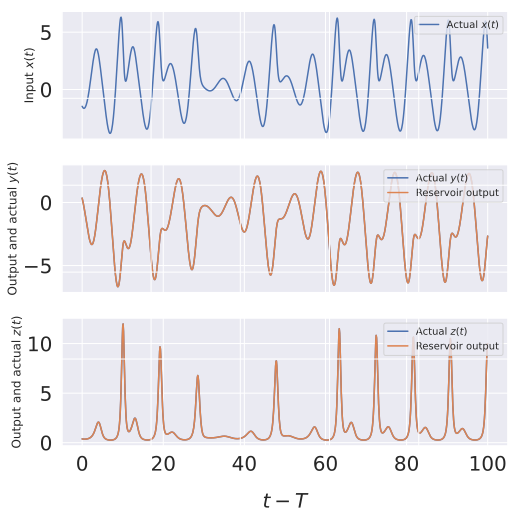

In [124]:
def rossler_example():
    '''Time Setting'''
    T = 260
    dt = 0.1
    
    '''Training Signal Setting'''
    signal_type = Rossler(dt=dt, X0=[0.,0.,0.])
    signal = Signal(signal_type=signal_type, T=T)
    observer = Reservoir(dt=signal.dt, n=signal.Y.shape[0], m=signal.X.shape[0], alpha=0.2, beta=1e-8)
    observer.train(signal.Y, signal.X, show_time=False)

    '''Testing Signal Setting'''
    signal_type = Rossler(dt=dt, X0=signal.X[:,-1])
    signal = Signal(signal_type=signal_type, T=100)
    X_hat = observer.run(signal.Y, show_time=False)

    fontsize = 20
    fig, axes = plt.subplots(3,1,figsize=(8,8), sharex=True)
    axes[0].plot(signal.t, signal.X[0], label='Actual $x(t)$')
    axes[0].legend(fontsize=fontsize-10, loc='upper right')
    axes[0].tick_params(labelsize=fontsize)
    axes[0].set_ylabel('Input $x(t)$')
    axes[1].plot(signal.t, signal.X[1], label='Actual $y(t)$')
    axes[1].plot(signal.t, X_hat[1], label='Reservoir output')
    axes[1].legend(fontsize=fontsize-10, loc='upper right', ncol=1)
    axes[1].tick_params(labelsize=fontsize)
    axes[1].set_ylabel('Output and actual $y(t)$')
    axes[2].plot(signal.t, signal.X[2], label='Actual $z(t)$')
    axes[2].plot(signal.t, X_hat[2], label='Reservoir output')
    axes[2].legend(fontsize=fontsize-10, loc='upper right', ncol=1)
    axes[2].tick_params(labelsize=fontsize)
    axes[2].set_ylabel('Output and actual $z(t)$')
    fig.add_subplot(111, frameon=False)
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.xlabel('\n$t-T$', fontsize=fontsize)
    plt.savefig('Rossler system.pdf', format='pdf')
    plt.show()

if __name__=='__main__':
    rossler_example()

###  Lorenz system

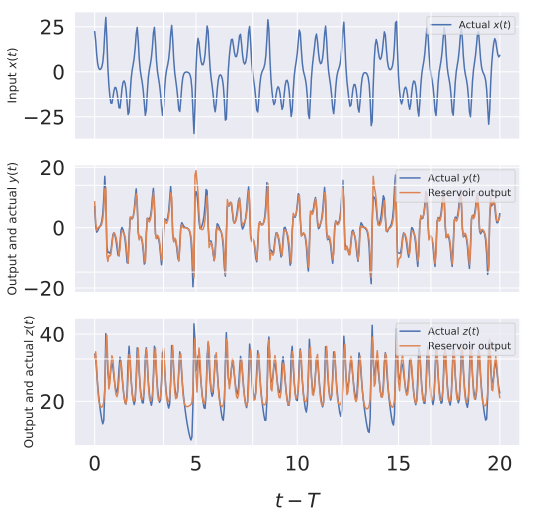

In [125]:
def lorenz_example():
    '''Time Setting'''
    T = 260
    dt = 0.05
    
    '''Training Signal Setting'''
    signal_type = Lorenz(dt=dt, X0=[1.,1.,1.])
    signal = Signal(signal_type=signal_type, T=T)
    observer = Reservoir(dt=signal.dt, n=signal.Y.shape[0], m=signal.X.shape[0], alpha=0.2, beta=1e-8)
    observer.train(signal.Y, signal.X, show_time=False)

    '''Testing Signal Setting'''
    signal_type = Lorenz(dt=dt, X0=signal.X[:,-1])
    signal = Signal(signal_type=signal_type, T=20)
    X_hat = observer.run(signal.Y, show_time=False)

    fontsize = 20
    fig, axes = plt.subplots(3,1,figsize=(8,8), sharex=True)
    axes[0].plot(signal.t, signal.X[0], label='Actual $x(t)$')
    axes[0].legend(fontsize=fontsize-10, loc='upper right')
    axes[0].tick_params(labelsize=fontsize)
    axes[0].set_ylabel('Input $x(t)$')
    axes[1].plot(signal.t, signal.X[1], label='Actual $y(t)$')
    axes[1].plot(signal.t, X_hat[1], label='Reservoir output')
    axes[1].legend(fontsize=fontsize-10, loc='upper right', ncol=1)
    axes[1].tick_params(labelsize=fontsize)
    axes[1].set_ylabel('Output and actual $y(t)$')
    axes[2].plot(signal.t, signal.X[2], label='Actual $z(t)$')
    axes[2].plot(signal.t, X_hat[2], label='Reservoir output')
    axes[2].legend(fontsize=fontsize-10, loc='upper right', ncol=1)
    axes[2].tick_params(labelsize=fontsize)
    axes[2].set_ylabel('Output and actual $z(t)$')
    fig.add_subplot(111, frameon=False)
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.xlabel('\n$t-T$', fontsize=fontsize)
    plt.savefig('Lorenz system.pdf', format='pdf')
    plt.show()

if __name__=='__main__':
    lorenz_example()